<b> <h1>PROJET DE RECHERCHE</h1></b>


In [3]:
##Uncomment this to install required packages if needed (and restart kernel !)
#! pip install --upgrade pandas
#! pip install --upgrade seaborn
#! pip install --upgrade numpy

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [5]:
avis = pd.read_csv('../../../PROJET-RECHERCHE/avis_processed.csv')
avis.fillna('', inplace=True)
avis.head()

,author,date_published,title_review,note,title,url,comment
0,Monsieur Guillaume,2021-01,Voyages sur les ailes des papillons,8,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10,le festival de Michoacan,7,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02,Vivez la migration des monarques,7,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11,Bon,8,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,
4,prunelles,2021-05,Envolez-moi,9,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,"Très joli bijou que ce jeu-là ! Le matériel, l..."


<h2>Travail sur les auteurs</h2>

In [6]:
nb_auteurs = avis['author'].value_counts()

nb_auteurs.describe()

count    13623.000000
mean        12.937165
std         46.143732
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       1697.000000
Name: count, dtype: float64

A vu d'oeil, on voit qu'il y'a en tout 13623 auteurs differents. Un auteur écrit 18 avis en moyenne. L'auteur avec le plus d'avis en a écrit 2194 et on a une variance qui est de 62,45. 
Dans la suite, nous étudions les différentes tranches d'avis pour mieux comprendre la base de données.

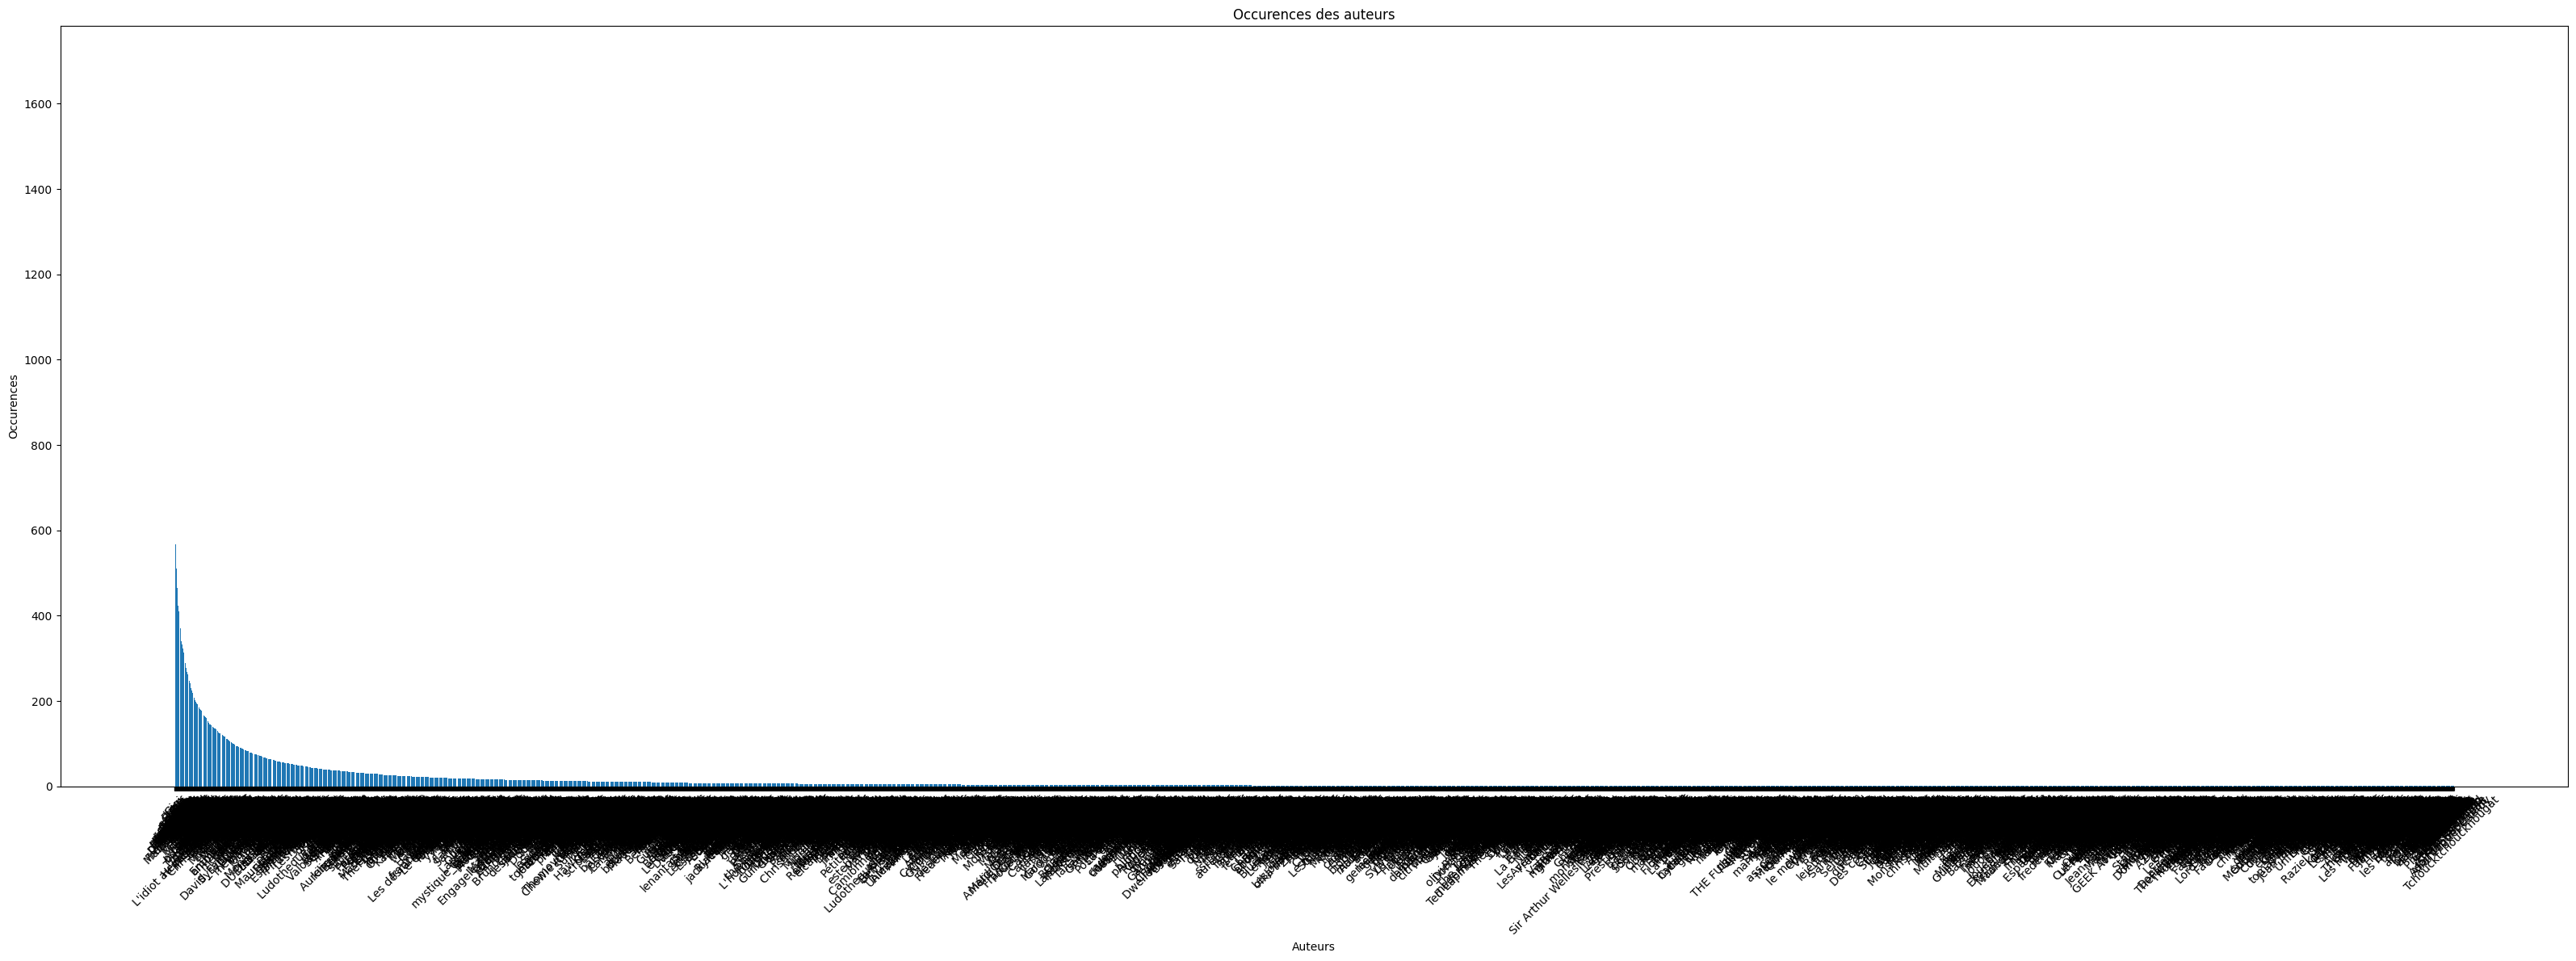

In [7]:
plt.figure(figsize=(32,12))
plt.bar(nb_auteurs.index, nb_auteurs.values)
plt.xlabel('Auteurs')
plt.ylabel('Occurences')
plt.title('Occurences des auteurs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

On remarque bien qu'on ne voit pas grand chose du au fait qu'il y'a énormément d'auteurs (13623). On distingue quand même la forme de la courbe. \n on commence donc par chercher les top 100 auteurs et faire un deuxieme histogramme.

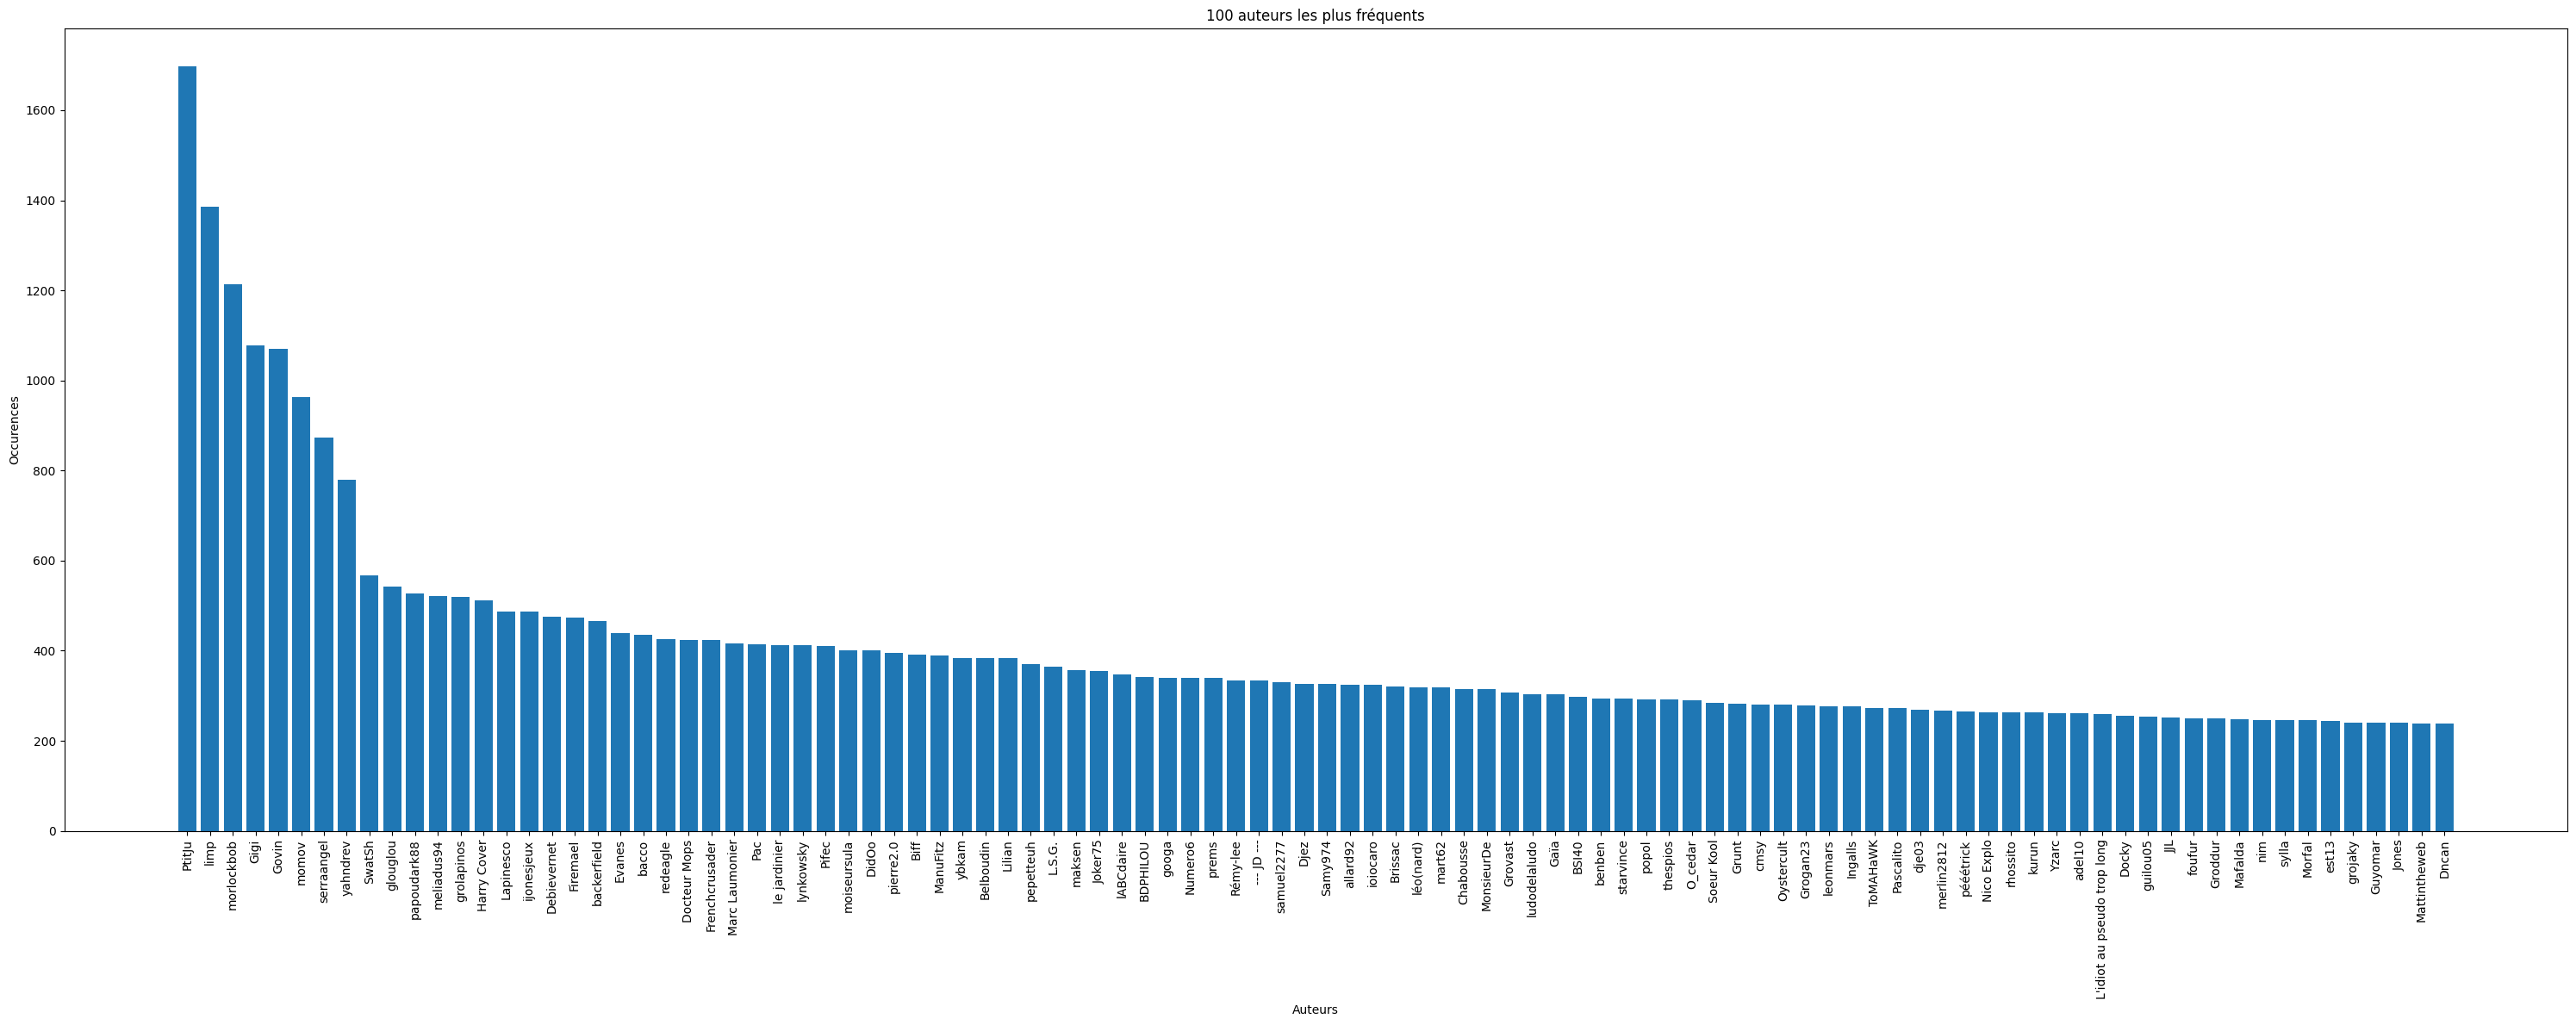

In [8]:
top_100_auteurs = nb_auteurs.head(100)

plt.figure(figsize=(30, 12))  
plt.bar(top_100_auteurs.index, top_100_auteurs.values)
plt.xlabel('Auteurs')
plt.ylabel('Occurences')
plt.title('100 auteurs les plus fréquents')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Cet histogramme nous permets de mieux comprendre la distribution par auteurs.

In [9]:
nb_auteurs_1000 = len(nb_auteurs[nb_auteurs > 1000])

pourcentage_1000 = (nb_auteurs_1000/len(nb_auteurs))*100

print("Il n'y'a seulement que %d auteurs qui ont écris plus de 1000 avis" % nb_auteurs_1000)
print("ce qui représente %.2f pourcent de la table" % pourcentage_1000)

Il n'y'a seulement que 5 auteurs qui ont écris plus de 1000 avis
ce qui représente 0.04 pourcent de la table


In [10]:
nb_auteurs_500_1000 = len(nb_auteurs[(nb_auteurs>=500)&(nb_auteurs<=1000)])

pourcentage_500_1000 = (nb_auteurs_500_1000/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écrit entre 500 et 1000 avis " % nb_auteurs_500_1000)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500_1000)

Il y'a 9 auteurs qui ont écrit entre 500 et 1000 avis 
ce qui représente 0.07 pourcent de la table


In [11]:
nb_auteurs_500 = len(nb_auteurs[(nb_auteurs<500)])

pourcentage_500 = (nb_auteurs_500/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écrit moins de 500 avis" % nb_auteurs_500)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500)

Il y'a 13609 auteurs qui ont écrit moins de 500 avis
ce qui représente 99.90 pourcent de la table


On remarque donc que la plus grande majorité des auteurs écrivent moins de 500 commentaires.

In [12]:
nb_auteurs_500_100 = len(nb_auteurs[(nb_auteurs<500) & (nb_auteurs>=100)])

pourcentage_500_100 = (nb_auteurs_500_100/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 500 et 100 avis" % nb_auteurs_500_100)
print("ce qui représente %.2f pourcent de la table" % pourcentage_500_100)

Il y'a 345 auteurs qui ont écris entre 500 et 100 avis
ce qui représente 2.53 pourcent de la table


On en conclut donc que la plupart des utilisateurs écrivent moins de 100 avis

In [13]:
nb_auteurs_50 = len(nb_auteurs[(nb_auteurs < 100) & (nb_auteurs >= 50)])

pourcentage_50 = (nb_auteurs_50/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 50 et 100 avis" % nb_auteurs_50)
print("ce qui répresente %.2f pourcent de la table" % pourcentage_50)

Il y'a 375 auteurs qui ont écris entre 50 et 100 avis
ce qui répresente 2.75 pourcent de la table


In [14]:
nb_auteurs_20 = len(nb_auteurs[(nb_auteurs<20) & (nb_auteurs>=1)])

pourcentage_20 = (nb_auteurs_20/len(nb_auteurs))*100

print("Il y'a %d auteurs qui ont écris entre 20 et 1 avis" % nb_auteurs_20)
print("ce qui représente %.2f pourcent de la table" % pourcentage_20)

Il y'a 11991 auteurs qui ont écris entre 20 et 1 avis
ce qui représente 88.02 pourcent de la table


Suite à toutes ces statistiques, on remarque qu'environ <b>$80$</b> % des utilisateurs écrivent entre 20 et 1 avis, ce qui est assez peu. On suppopsera donc dans la suite de mettre un threshold à ce niveau la.

<h2>Travail sur les jeux</h2>

In [44]:
details = pd.read_csv('../../../PROJET-RECHERCHE/details_processed.csv')

In [45]:
details.fillna('', inplace=True)
details.head()

,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères|Aventures dans la jungle|Collection /...,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,,Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,Card-driven|Combinaison|Coopération|Deck build...,Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


In [46]:
nb_avis = details["Nombre d'avis"]
nb_avis.describe()



count    16873.000000
mean        13.306762
std         52.063075
min          0.000000
25%          0.000000
50%          1.000000
75%          7.000000
max       1452.000000
Name: Nombre d'avis, dtype: float64

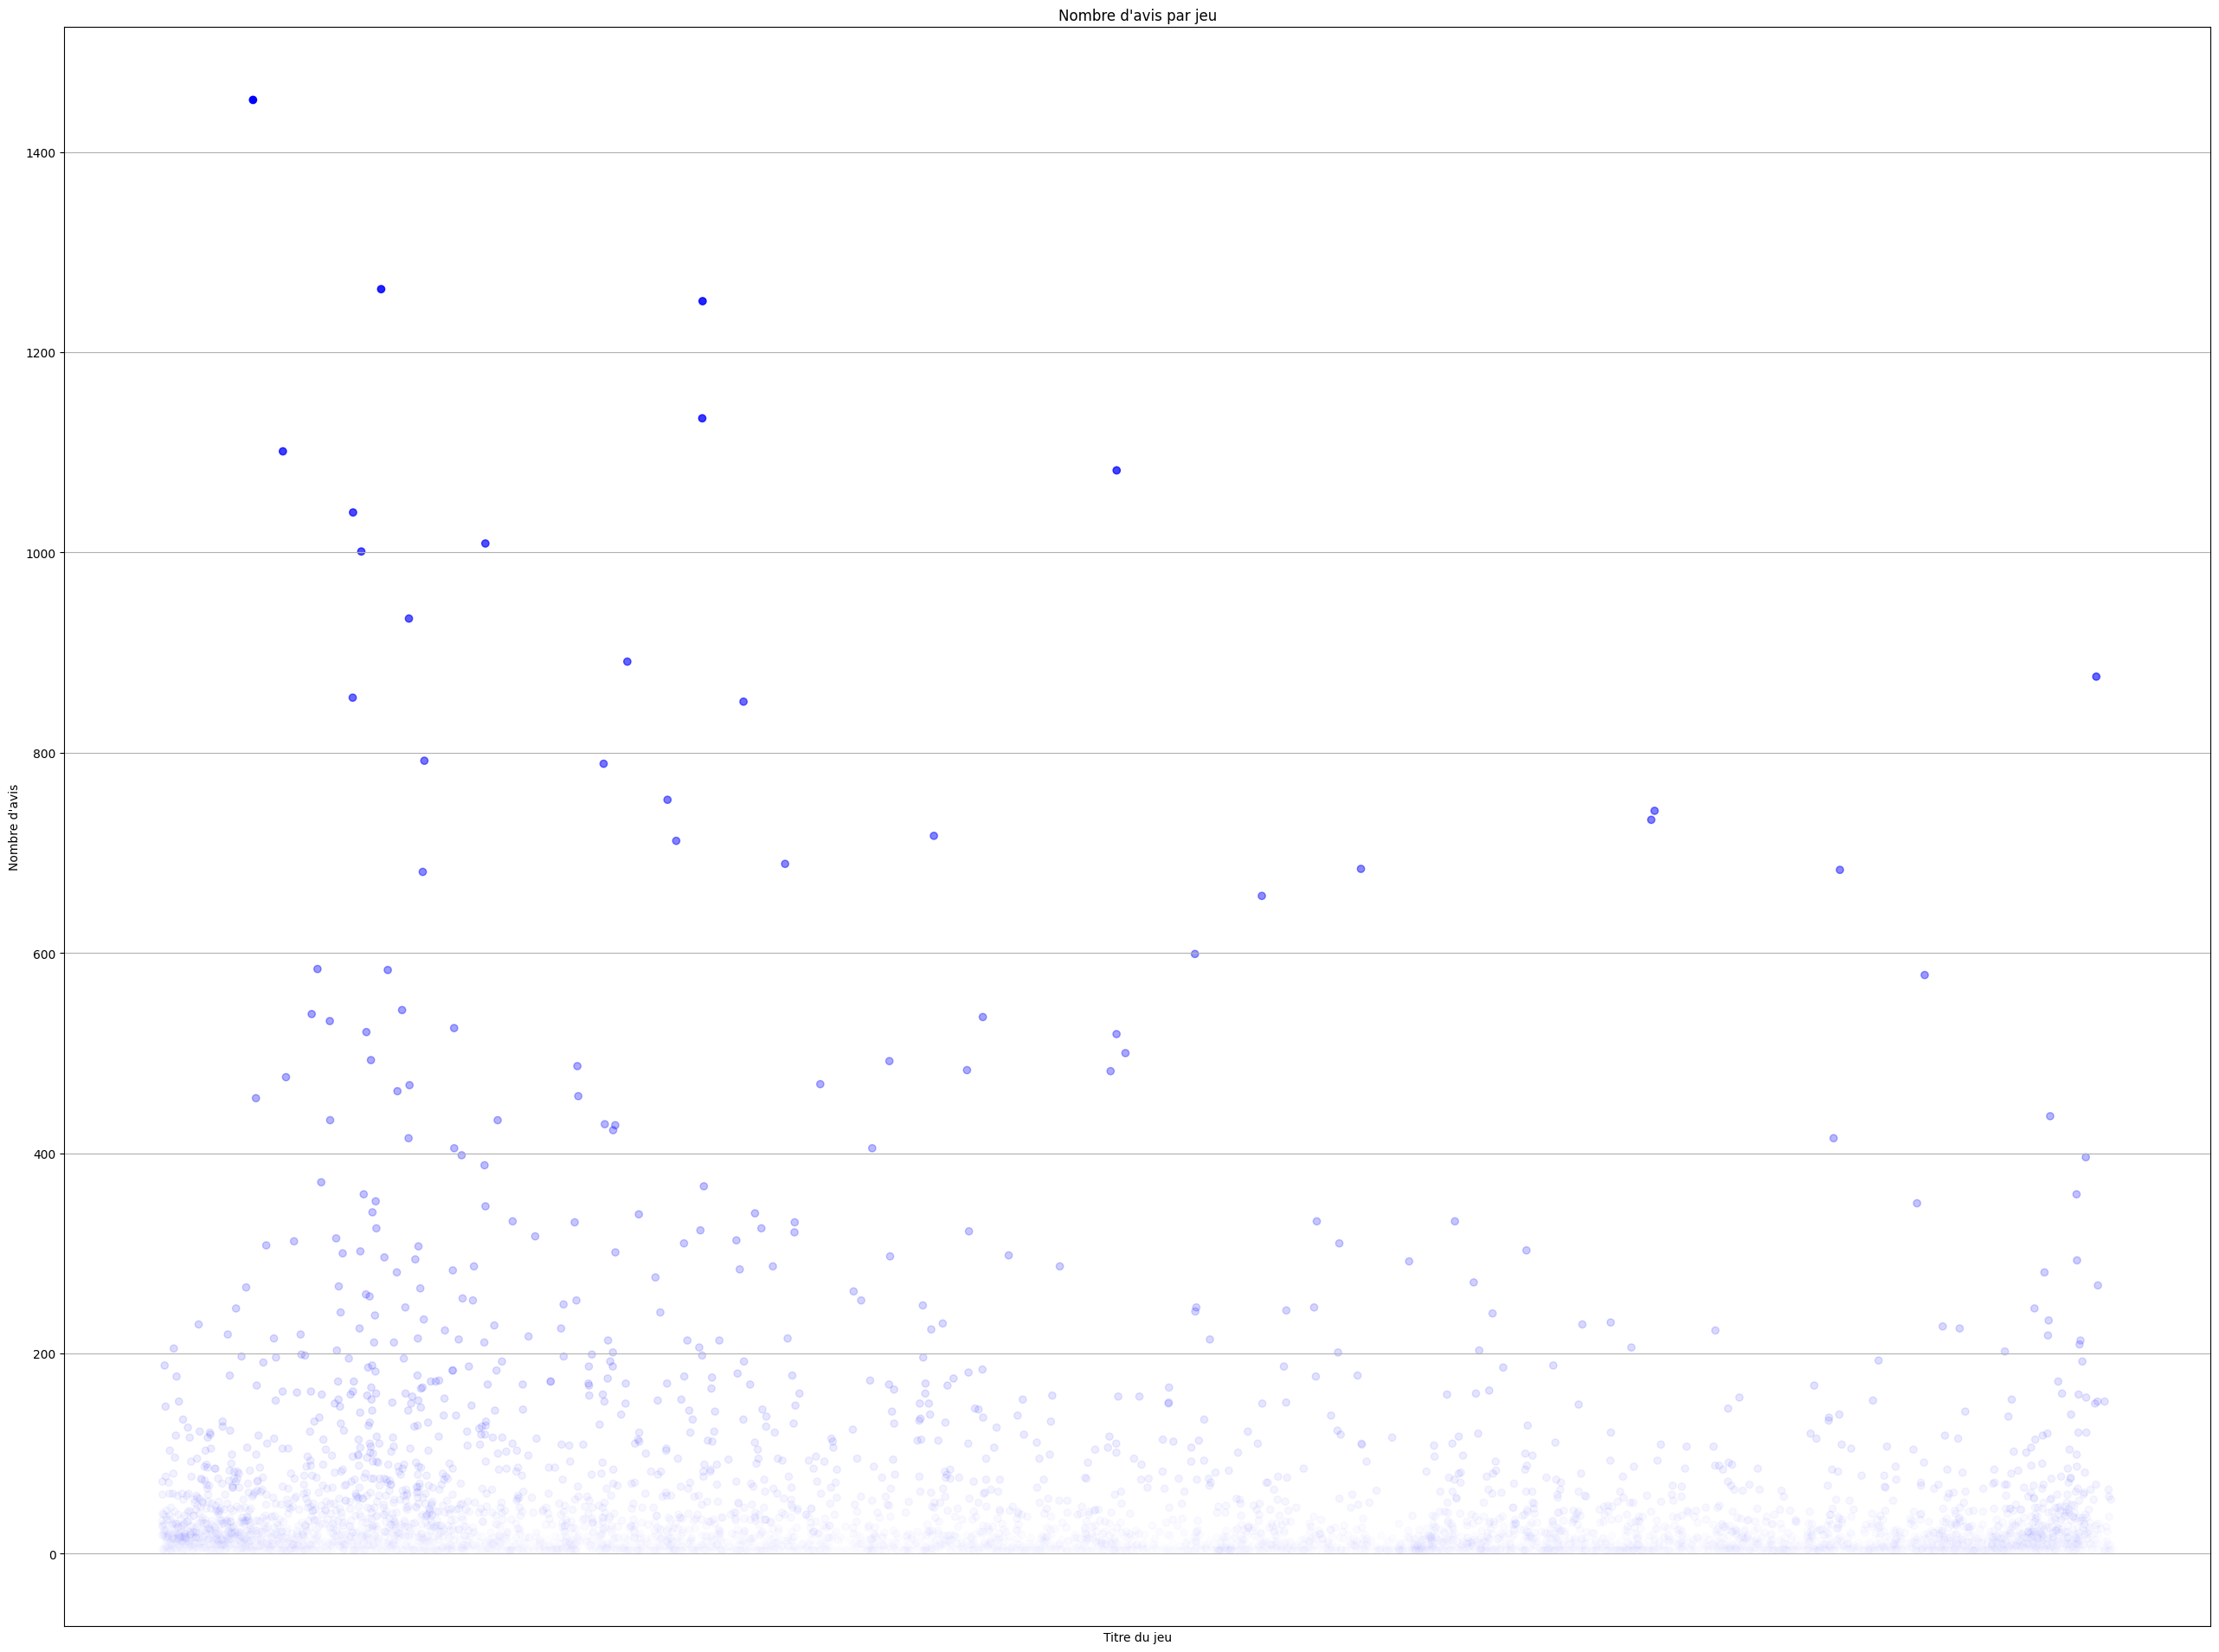

In [47]:
max_avis = details["Nombre d'avis"].max()
details['alpha'] = (details["Nombre d'avis"] / max_avis)

plt.figure(figsize=(32,24))
plt.scatter(details['full_title'], details["Nombre d'avis"], color='blue', alpha=details['alpha'])
plt.xlabel('Titre du jeu')
plt.ylabel('Nombre d\'avis')
plt.title('Nombre d\'avis par jeu')
plt.grid(True)
plt.xticks([])

plt.show()

Il y'a très peu de jeux avec plus de 1000 avis, la plupart sont en dessous de la barre des 200 avis. D'après la fonction describe (moyenne de 13 avis environ) et le scatter plot ci-dessus, on conclut que la plupart des jeux ont une vingtaine d'avis. On remarque aussi qu'il y'a beaucoup de jeux avec très peu voir 0 avis.

In [48]:
nb_jeux_0_avis = (nb_avis==0).sum()
nb_jeux_0_avis

5915

Il y'a 5915 jeux qui ont 0 notes.

<h4>Interessons nous maintenant sur les catégories </h4>

In [49]:
details.head()


,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel,alpha
0,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74,0.013085
1,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68,0.022727
2,Enchères|Aventures dans la jungle|Collection /...,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42,0.019284
3,,Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00,0.002755
4,Card-driven|Combinaison|Coopération|Deck build...,Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70,0.049587


In [50]:
details['categories'] = details['categories'].str.split('|')

In [51]:
details.head()

,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel,alpha
0,[],Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74,0.013085
1,[],Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68,0.022727
2,"[Enchères, Aventures dans la jungle, Collectio...",Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42,0.019284
3,[],Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00,0.002755
4,"[Card-driven, Combinaison, Coopération, Deck b...",Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70,0.049587


In [52]:
details_exploded = details.explode('categories')
details_exploded.head()

,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel,alpha
0,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74,0.013085
1,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68,0.022727
2,Enchères,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42,0.019284
2,Aventures dans la jungle,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42,0.019284
2,Collection / famille,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42,0.019284


In [53]:
occurrences_par_categorie = details_exploded['categories'].value_counts()
occurrences_par_categorie.sort_values(ascending=False)

categories
Jeux de plateau        5081
Jeux de cartes         2956
                       2198
Jeux de guerre         1279
Autres                  599
                       ... 
Chat                      1
Vêtements                 1
Enchères japonaises       1
Jeux à gratter            1
Archive                   1
Name: count, Length: 185, dtype: int64

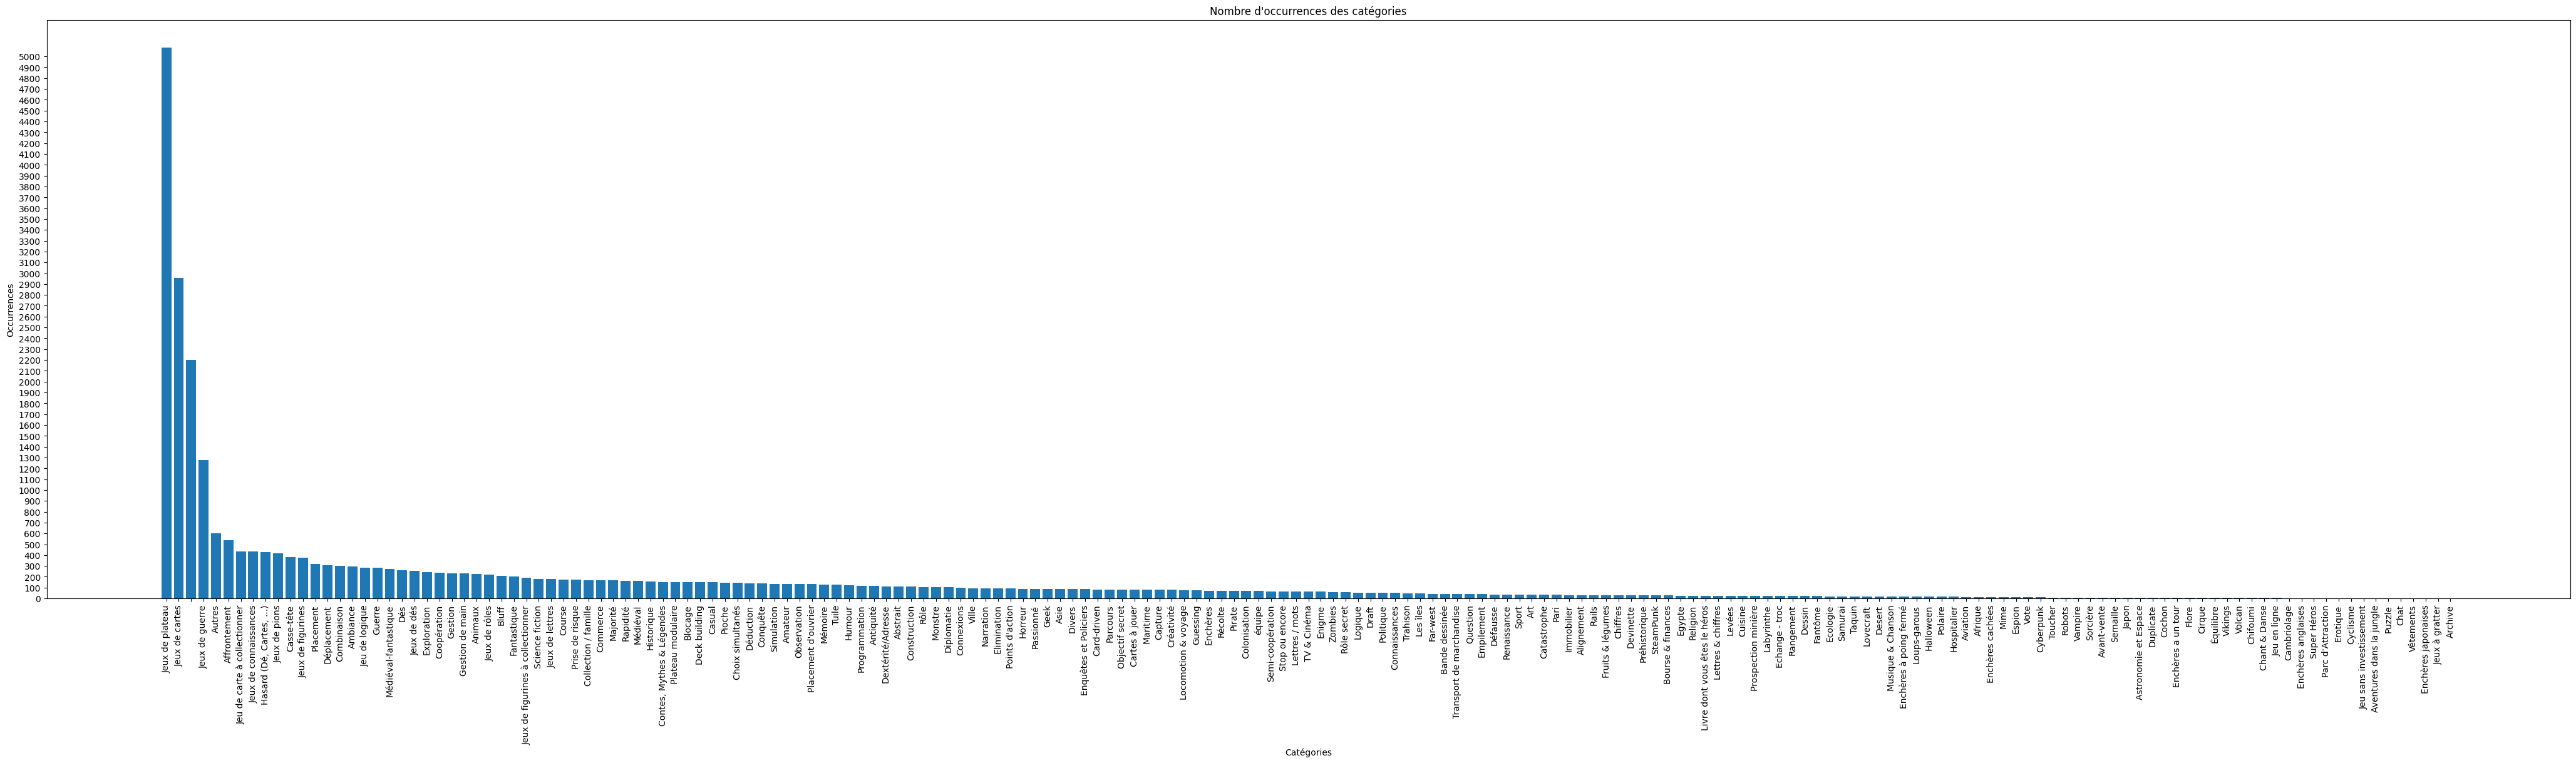

In [54]:
plt.figure(figsize=(52,12))
plt.bar(occurrences_par_categorie.index, occurrences_par_categorie.values)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Nombre d\'occurrences des catégories')
plt.xticks(rotation=90)
plt.yticks(range(0, 5100, 100))

plt.show()

Il y'a des catégories qui représentent le même type de jeu (cartes à jouer et jeux de cartes par exemple). On va donc chercher à fusionner ces différentes catégories.

In [55]:
correspondances = {
    'Cartes à jouer': 'Jeux de cartes',
    'Jeu de dés': 'Dés',
    'Enchères': 'Enchères japonaises',
    'Jeux de guerre' : 'Guerre'
}

details_exploded['categories'] = details_exploded['categories'].replace(correspondances)

occurrences_par_categorie = details_exploded['categories'].value_counts()
occurrences_par_categorie

categories
Jeux de plateau    5081
Jeux de cartes     3038
                   2198
Guerre             1564
Autres              599
                   ... 
Puzzle                1
Chat                  1
Vêtements             1
Jeux à gratter        1
Archive               1
Name: count, Length: 182, dtype: int64

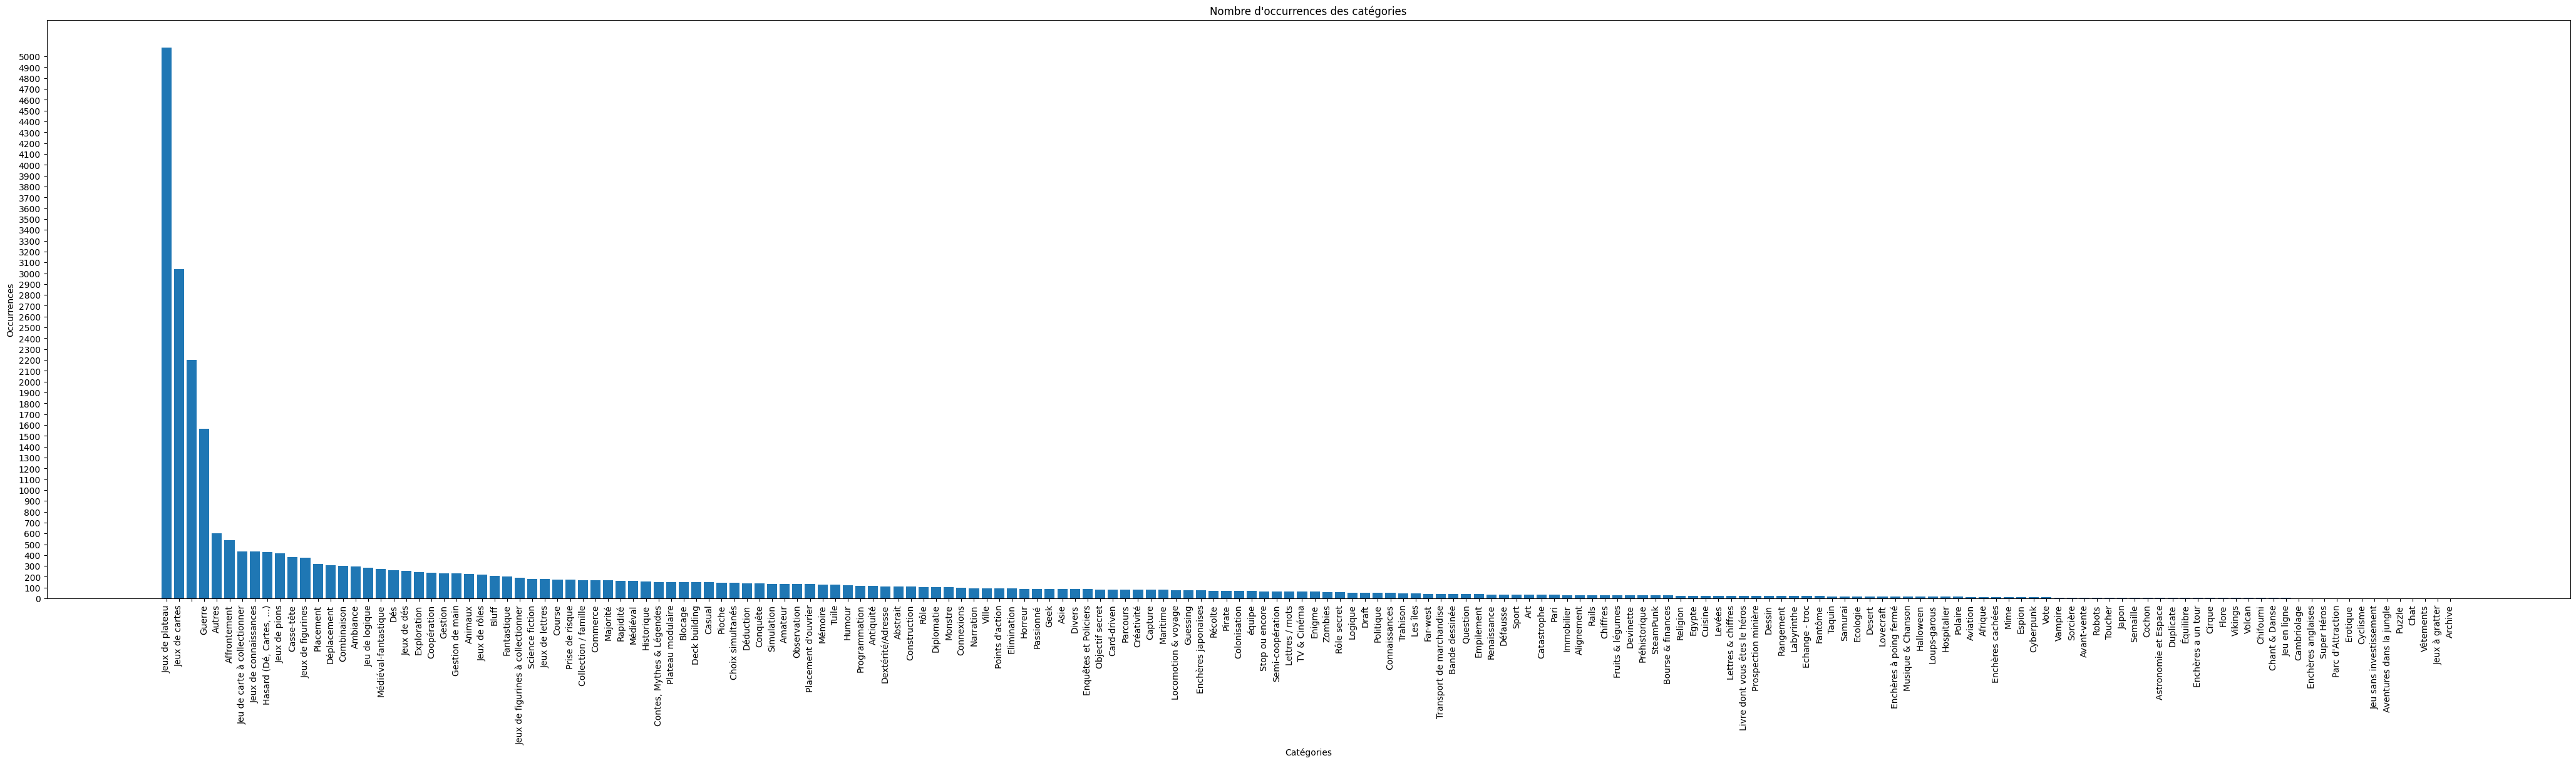

In [56]:
plt.figure(figsize=(52,12))
plt.bar(occurrences_par_categorie.index, occurrences_par_categorie.values)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Nombre d\'occurrences des catégories')
plt.xticks(rotation=90)
plt.yticks(range(0, 5100, 100))
plt.show()

Il faut fusionner encore certaines catégories

In [57]:
nombre_occurrences_categorie_vide = (details_exploded['categories'].isnull() | details_exploded['categories'].eq('')).sum()
nombre_occurrences_categorie_vide

2198

In [58]:
len(occurrences_par_categorie[occurrences_par_categorie>=10])

150

In [59]:
len(occurrences_par_categorie[occurrences_par_categorie>=100])

63

In [60]:
len(occurrences_par_categorie[occurrences_par_categorie>=200])

28

In [61]:
len(occurrences_par_categorie[occurrences_par_categorie<=500])

176

Pour calculer les stats :

In [62]:
occurrences_par_categorie.quantile(0.25), occurrences_par_categorie.mean(), occurrences_par_categorie.median()

(18.0, 157.57142857142858, 62.5)

Export to csv

In [63]:
occurrences_par_categorie.to_csv("occurrences_par_categorie.csv")

<h4> Travaillons sur les Casting </h4>